## Analisis Exploratorio de los Datos (EDA)
Continuación del notebook "ports_UK_EDA.ipynb"

Cargar los .csv directamente:

In [10]:
# %pip install prophet
# %pip install --upgrade plotnine
# %pip install --upgrade matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 18.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from prophet import Prophet
from plotnine import *
# import matplotlib

/home/gonzalopc/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# cargar csv
# Dataframes Drug Seizure UK:
uk_drug_seizure_df = pd.read_csv("../home_uk/uk_drug_seizure_df.csv", sep=",",header=0, skiprows=[44,45,46])
uk_drug_seizure_kg_df = pd.read_csv("../home_uk/uk_drug_seizure_kg_df.csv", sep=",",header=0, skiprows=[44,45,46])
uk_drug_seizure_ppm_df = pd.read_csv("../home_uk/uk_drug_seizure_ppm_df.csv", sep=",",header=0)

# Dataframes Ports and Freights UK:
uk_freight_df = pd.read_csv("../home_uk/uk_freight.csv", sep=",",header=0)
uk_vessels_in_port_df = pd.read_csv("../home_uk/uk_vessels_in_port.csv", sep=",",header=0)
uk_port_freight_quaterly_df = pd.read_csv("../home_uk/uk_port_freight_quaterly.csv", sep=",",header=0)
# uk_freight_in_vessels_df = pd.read_csv("../home_uk/uk_freight_in_vessels.csv", sep=",",header=0, skiprows=[54]) # Faltan eliminar los [Notes]

# Dataframe Ports con la informacion de los puertos (y los indices):
uk_ports_df = pd.read_csv("../home_uk/uk_ports.csv", sep=",",header=0)

1. Analisis Exploratorio de Datos para 'uk_vessels_in_port':

In [3]:
# 1. Join entre puertos UK y vessels_in_port
dataframe_vessels_in_port = uk_ports_df.merge(uk_vessels_in_port_df,
                  how='left', on='id_Port').drop(['key_1','Port_y'], axis=1)

In [ ]:
# 2. Estudio de datos completos
# Cuantos Missing Values
# Rango total
# Rango por puerto
# Estudio por Port group
# Estudio por Police Force Region


In [12]:
# 3. Estudio particular de un año
# Obervar % por puerto, grupo y region policial

In [4]:
# 4. Estudio de las series temporales
dataframe_vessels_in_port['average'] = dataframe_vessels_in_port.iloc[:,6:len(dataframe_vessels_in_port.columns)].mean(axis=1, skipna = True)

In [5]:
main_ports_uk = dataframe_vessels_in_port.sort_values('average', ascending=False).head(10)
main_ports_uk = main_ports_uk.drop('2017.1', axis=1)

In [6]:
new_columns = list(main_ports_uk.columns)

for i in range(6, len(new_columns) - 1):
    year = new_columns[i]
    new_columns[i] = pd.to_datetime(f"{year}-12-31").date()

main_ports_uk.columns = new_columns
# main_ports_uk.to_csv('main_ports_uk.csv', sep=',')

/home/gonzalopc/.local/lib/python3.10/site-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


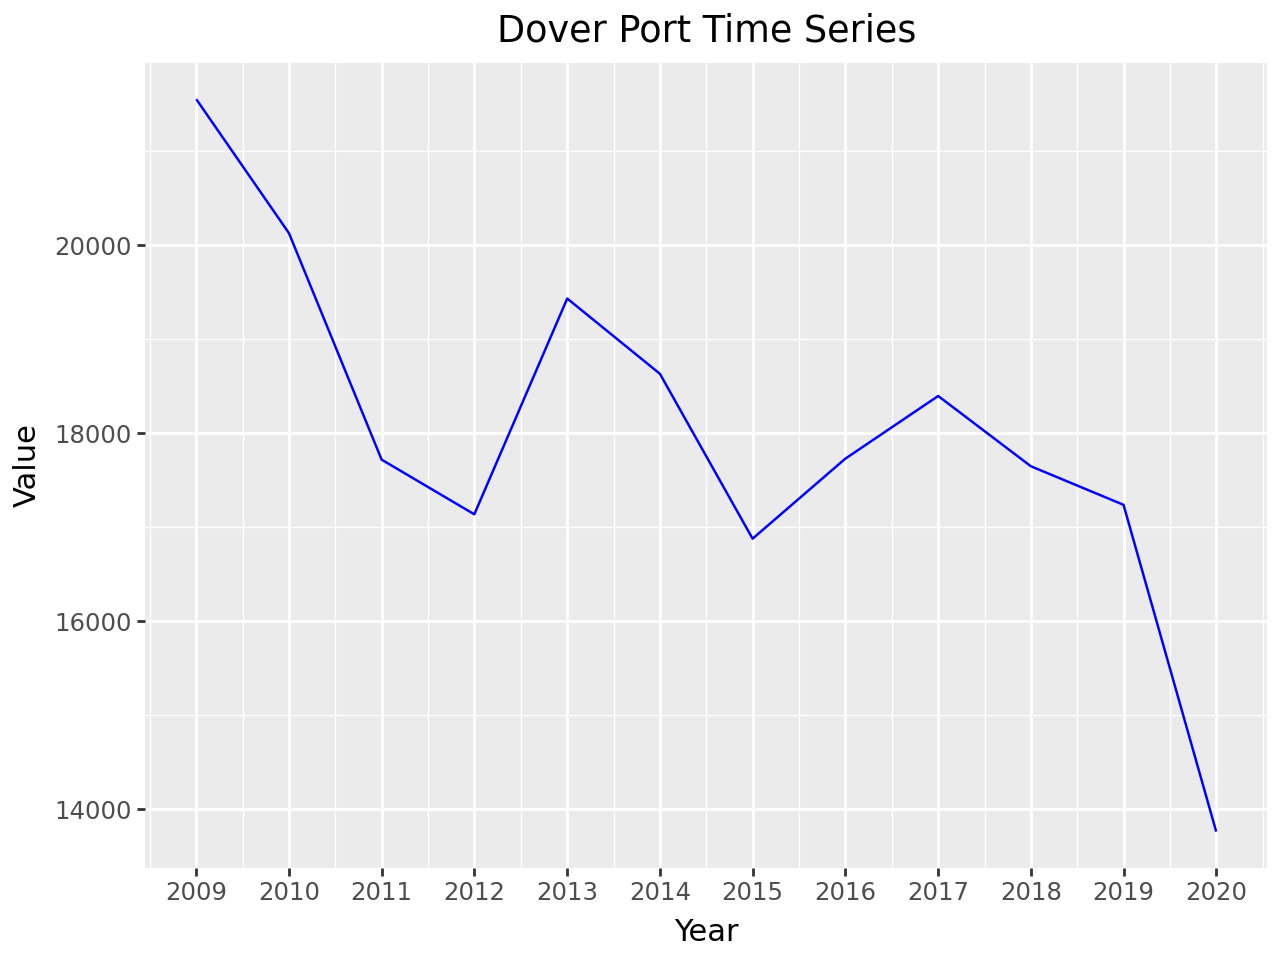

In [49]:
# Analisis puerto de Dover:
# Create the plotnine object
# Read the CSV
df = pd.read_csv('dover_port_ts.csv')
df['date'] = pd.to_datetime(df['Unnamed: 0'])

# Create the plot
(ggplot(df, aes(x='date', y='24'))
 + geom_line(color='blue')
#  + theme_minimal()
 + labs(title='Dover Port Time Series',
        x='Year',
        y='Value')
 + scale_x_datetime(date_breaks='1 year', date_labels='%Y'))


In [7]:
main_ports_uk.columns[list(range(6,len(main_ports_uk.columns)-1))]
main_ports_uk_ts = main_ports_uk[['Port_x'] + list(main_ports_uk.columns[6:len(main_ports_uk.columns)-1])] 

In [23]:
top_5_ports = main_ports_uk_ts.iloc[list(range(0,5))].T
top_5_ports.columns = top_5_ports.iloc[0]
top_5_ports = top_5_ports.drop(top_5_ports.index[0])
# top_5_ports.rename(columns={'Port_x':'Date'}, inplace=True)
top_5_ports.index = pd.to_datetime(top_5_ports.index)

In [38]:
top_5_ports_melted = top_5_ports.melt(ignore_index=False, var_name='Port', value_name='Vessels')
top_5_ports_melted['date'] = top_5_ports_melted.index
top_5_ports_melted = top_5_ports_melted.sort_values(by='date')
top_5_ports_melted['date'] = pd.to_datetime(top_5_ports_melted['date'])

/home/gonzalopc/.local/lib/python3.10/site-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


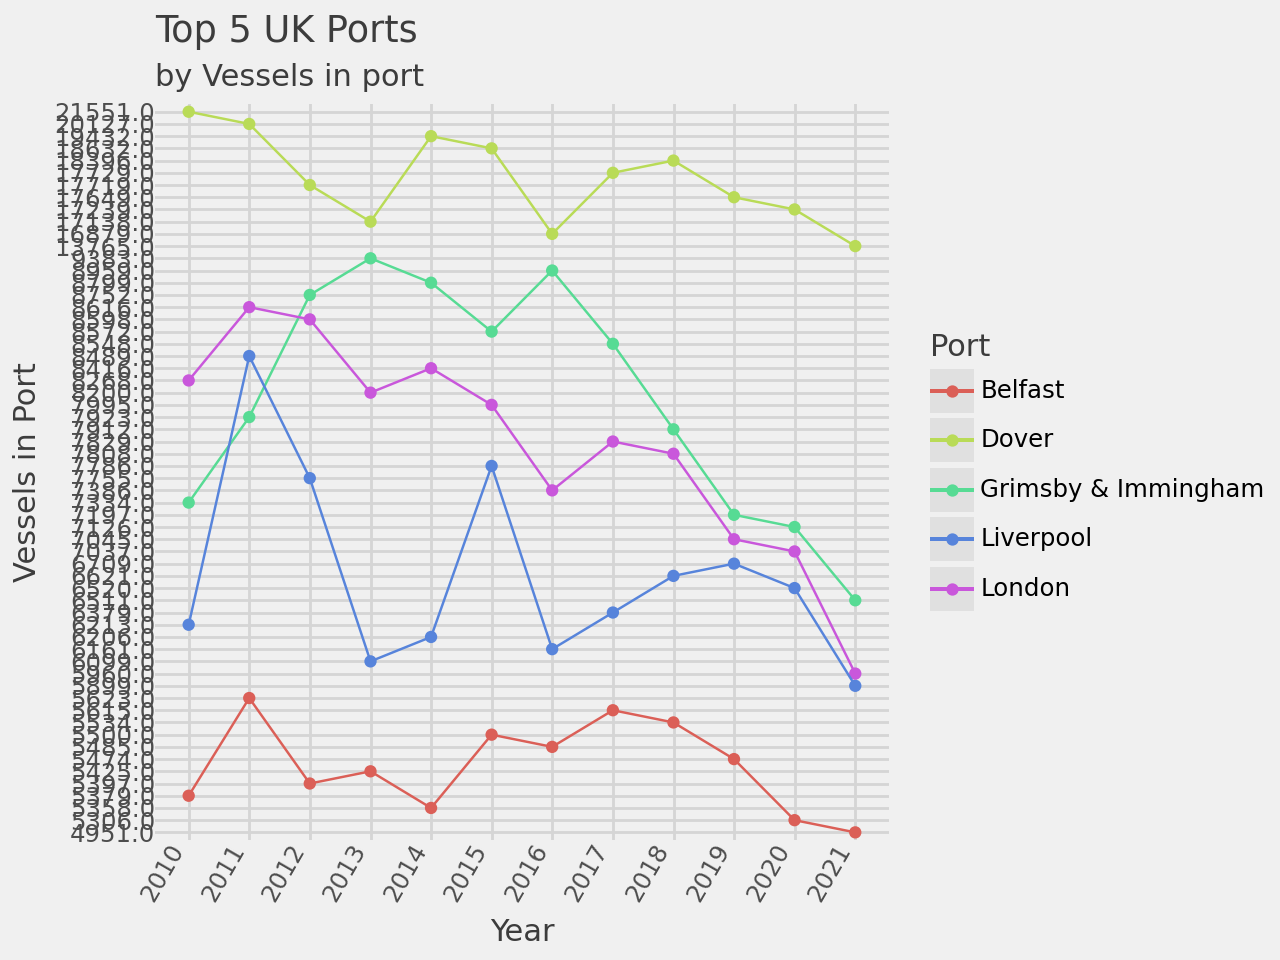

In [59]:
# Create the plot
(ggplot(top_5_ports_melted, aes(x='date', y='Vessels', color='Port', group='Port'))
 + geom_point()
 + geom_line()
 + scale_x_datetime(date_breaks='1 year', date_labels='%Y')
 + theme_538()
 + labs(title='Top 5 UK Ports',
        subtitle='by Vessels in port',
        x='Year',
        y='Vessels in Port')
 + theme(axis_text_x=element_text(angle=60, hjust=1))
 )


2. EDA para 'uk_freight'

In [67]:
# 1. Join entre puertos UK y uk_freight
dataframe_uk_freight = uk_ports_df.merge(uk_freight_df,
                  how='left', on='id_Port').drop(['key_1','FK_Port'], axis=1)


In [ ]:
# 2. Estudio de datos completos
# Cuantos Missing Values
# Rango total
# Rango por puerto
# Estudio por Port group
# Estudio por Police Force Region


In [ ]:
# 3. Estudio particular de un año
# Obervar % por puerto, grupo y region policial



In [75]:
# 4. Estudio de las series temporales
dataframe_uk_freight['average'] = dataframe_uk_freight.iloc[:,6:len(dataframe_uk_freight.columns)].mean(axis=1, skipna = True)
main_ports_uk = dataframe_uk_freight.sort_values('average', ascending=False).head(10)

In [78]:
new_columns = list(main_ports_uk.columns)

for i in range(6, len(new_columns) - 1):
    year = new_columns[i]
    new_columns[i] = pd.to_datetime(f"{year}-12-31").date()

main_ports_uk.columns = new_columns
# main_ports_uk.to_csv('main_ports_uk.csv', sep=',')

In [81]:
main_ports_uk.columns[list(range(6,len(main_ports_uk.columns)-1))]
main_ports_uk_ts = main_ports_uk[['Port'] + list(main_ports_uk.columns[6:len(main_ports_uk.columns)-1])] 

In [83]:
top_5_ports = main_ports_uk_ts.iloc[list(range(0,5))].T
top_5_ports.columns = top_5_ports.iloc[0]
top_5_ports = top_5_ports.drop(top_5_ports.index[0])
# top_5_ports.rename(columns={'Port_x':'Date'}, inplace=True)
top_5_ports.index = pd.to_datetime(top_5_ports.index)

In [87]:
top_5_ports_melted = top_5_ports.melt(ignore_index=False, var_name='Port', value_name='Freight')
top_5_ports_melted['date'] = top_5_ports_melted.index
top_5_ports_melted = top_5_ports_melted.sort_values(by='date')
top_5_ports_melted['date'] = pd.to_datetime(top_5_ports_melted['date'])

In [92]:
max(top_5_ports_melted["Freight"])

66278.848

/home/gonzalopc/.local/lib/python3.10/site-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


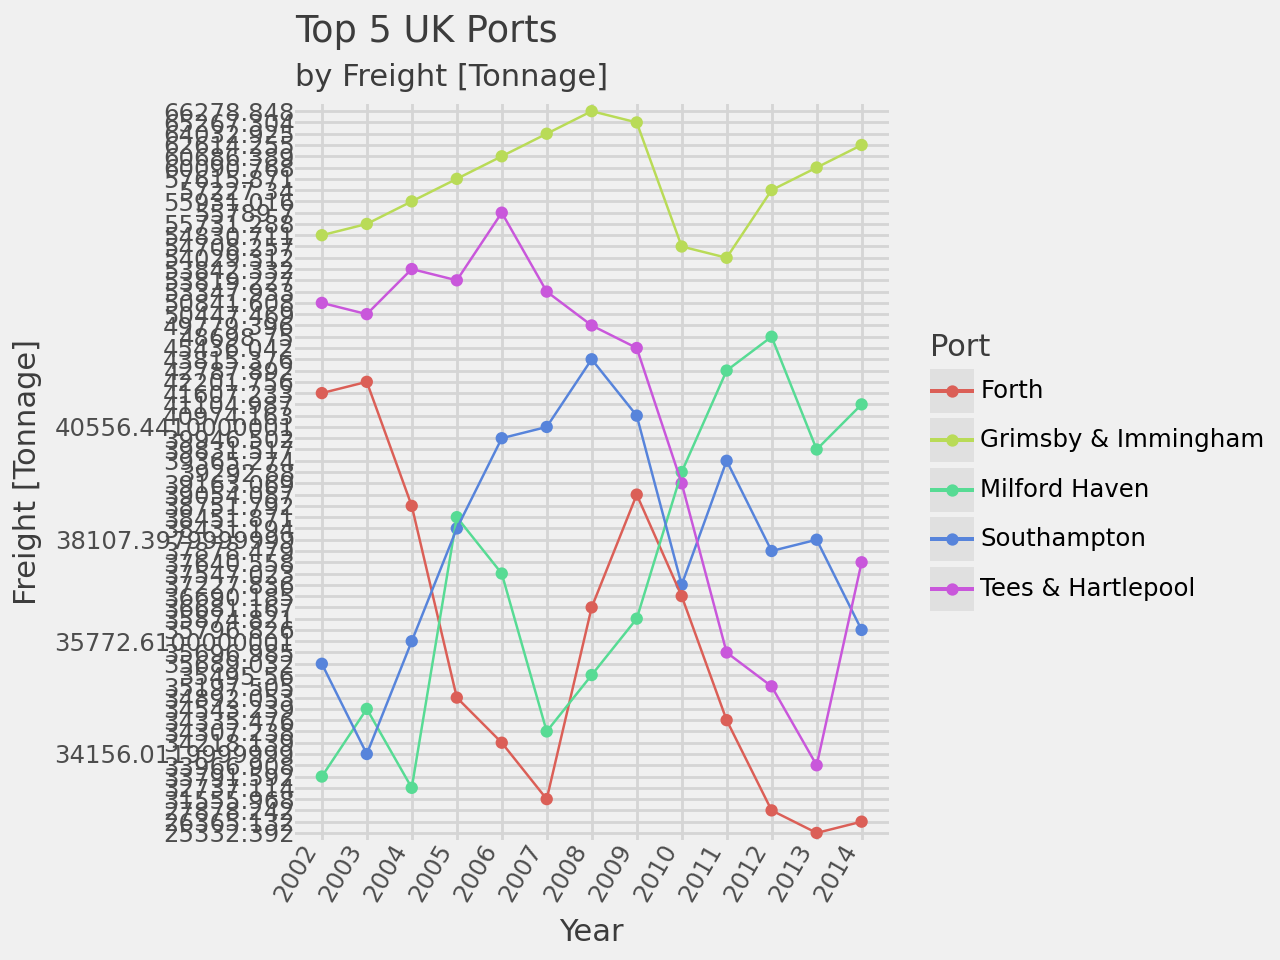

In [95]:
# Create the plot
(ggplot(top_5_ports_melted, aes(x='date', y='Freight', color='Port', group='Port'))
 + geom_point()
 + geom_line()
 + scale_x_datetime(date_breaks='1 year', date_labels='%Y')
 + theme_538()
 + labs(title='Top 5 UK Ports',
        subtitle='by Freight [Tonnage]',
        x='Year',
        y='Freight [Tonnage]')
 + theme(axis_text_x=element_text(angle=60, hjust=1))
#  + scale_y_continuous(breaks=range(20000, 70000, 5000))
 )


Liverpool (6º), Dover (8º)

3. EDA para 'uk_vessels_freight'

In [ ]:
# 1. Join entre puertos UK y uk_vessels_freight

# 2. Estudio de datos completos

# 3. Estudio particular de un año

# 4. Estudio de las series temporales

4. EDA para 'uk_port_freight_quaterly'

In [104]:
# 1. Join entre puertos UK y uk_port_freight_quaterly
dataframe_uk_port_freight_quarterly = uk_ports_df.merge(uk_port_freight_quaterly_df,
                  how='left', on='id_Port').drop(['key_1','Major Port'], axis=1).dropna()

In [ ]:
# 2. Estudio de datos completos

# 3. Estudio particular de un año


In [109]:
# 4. Estudio de las series temporales
dataframe_uk_port_freight_quarterly['average'] = dataframe_uk_port_freight_quarterly.iloc[:,6:len(dataframe_uk_port_freight_quarterly.columns)].mean(axis=1, skipna = True)
main_ports_uk = dataframe_uk_port_freight_quarterly.sort_values('average', ascending=False).head(10)

In [107]:
new_columns = list(main_ports_uk.columns)

# for i in range(6, len(new_columns) - 1):
#     year = new_columns[i]
#     new_columns[i] = pd.to_datetime(f"{year}-12-31").date()

main_ports_uk.columns = new_columns
# main_ports_uk.to_csv('main_ports_uk.csv', sep=',')

In [114]:
main_ports_uk.columns[list(range(6,len(main_ports_uk.columns)-1))]
main_ports_uk_ts = main_ports_uk[['Port'] + list(main_ports_uk.columns[6:len(main_ports_uk.columns)-4])] 

In [115]:
main_ports_uk_ts

,Port,2009 Q1,2009 Q2,2009 Q3,2009 Q4,2010 Q1,2010 Q2,2010 Q3,2010 Q4,2011 Q1,...,2021 Q3,2021 Q4,2022 Q1,2022 Q2,2022 Q3,2022 Q4,2023 Q1,2023 Q2,2023 Q3,2023 Q4
62,Milford Haven,9231.064,9228.165,10207.544,10626.107,10428.846,9353.357,10950.521,12055.168,12418.590,...,7012.262,9259.530,10359.640,10446.688,9152.652,8943.083,10122.613,9115.657,7012.882,8430.104
54,Liverpool,7531.540,7466.943,7401.158,7536.781,6159.230,7747.305,7329.349,8783.919,7705.244,...,8573.932,8852.418,8745.711,8883.474,8128.140,7864.453,7308.111,7425.821,7083.508,6733.482
30,Forth,9659.907,10010.319,7675.706,9344.253,8775.158,8675.096,8051.761,8833.461,7428.094,...,4849.219,5950.032,5222.093,5361.708,4848.059,5097.130,4551.686,4825.510,4265.261,4878.523
27,Felixstowe,5262.042,5988.370,6615.762,6400.971,6215.201,6647.291,6678.880,6215.068,6524.561,...,5844.106,5270.594,5479.512,5695.927,5652.658,5369.164,5407.553,6048.676,5951.896,5117.852
24,Dover,6394.412,6285.151,6338.820,6068.603,6277.883,6198.134,5971.918,5645.141,6178.412,...,5093.969,5143.118,4997.867,4372.717,4529.704,4469.004,4784.092,4911.469,4764.007,4765.844
6,Belfast,3007.988,2923.596,3037.229,3080.698,3223.432,3263.811,2976.258,3363.363,3347.717,...,4928.398,5258.562,4993.255,4637.944,4292.184,4448.603,4593.817,4776.547,4723.277,4343.511
61,Medway,3603.415,3307.301,3176.841,3062.026,3364.318,2798.625,3583.797,4224.125,3910.936,...,1756.378,2708.842,3261.108,3381.351,2489.459,4240.795,3909.968,3642.159,2195.285,3851.556
19,Clyde,3593.497,2439.997,3082.532,3436.098,2789.874,2720.338,3162.194,3610.738,3318.912,...,2770.208,1823.259,2395.316,2412.669,2409.513,2594.993,2317.318,1655.909,2222.714,2398.223
43,Hull,2617.083,2633.179,2333.986,2186.344,2366.585,2432.613,2340.692,2096.602,2233.616,...,2469.669,2277.641,2147.445,2328.918,2156.207,2172.892,2098.289,2047.518,1967.296,2054.005
13,Bristol,2687.937,2235.162,2209.382,1866.919,1675.430,1762.210,1705.781,2128.505,1568.309,...,1960.175,1610.813,2032.451,2108.920,2378.459,2008.269,2144.524,2071.135,2176.560,2145.232


In [117]:
top_5_ports = main_ports_uk_ts.iloc[list(range(0,5))].T
top_5_ports.columns = top_5_ports.iloc[0]
top_5_ports = top_5_ports.drop(top_5_ports.index[0])
# top_5_ports.rename(columns={'Port_x':'Date'}, inplace=True)
# top_5_ports.index = pd.to_datetime(top_5_ports.index)

In [120]:
top_5_ports_melted = top_5_ports.melt(ignore_index=False, var_name='Port', value_name='Freight')
top_5_ports_melted['date'] = top_5_ports_melted.index
top_5_ports_melted = top_5_ports_melted.sort_values(by='date')
# top_5_ports_melted['date'] = pd.to_datetime(top_5_ports_melted['date'])

In [ ]:
max(top_5_ports_melted["Freight"])

66278.848

In [123]:
top_5_ports_melted

,Port,Freight,date
2009 Q1,Milford Haven,9231.064,2009 Q1
2009 Q1,Felixstowe,5262.042,2009 Q1
2009 Q1,Forth,9659.907,2009 Q1
2009 Q1,Liverpool,7531.54,2009 Q1
2009 Q1,Dover,6394.412,2009 Q1
...,...,...,...
2023 Q4,Felixstowe,5117.852,2023 Q4
2023 Q4,Liverpool,6733.482,2023 Q4
2023 Q4,Milford Haven,8430.104,2023 Q4
2023 Q4,Forth,4878.523,2023 Q4


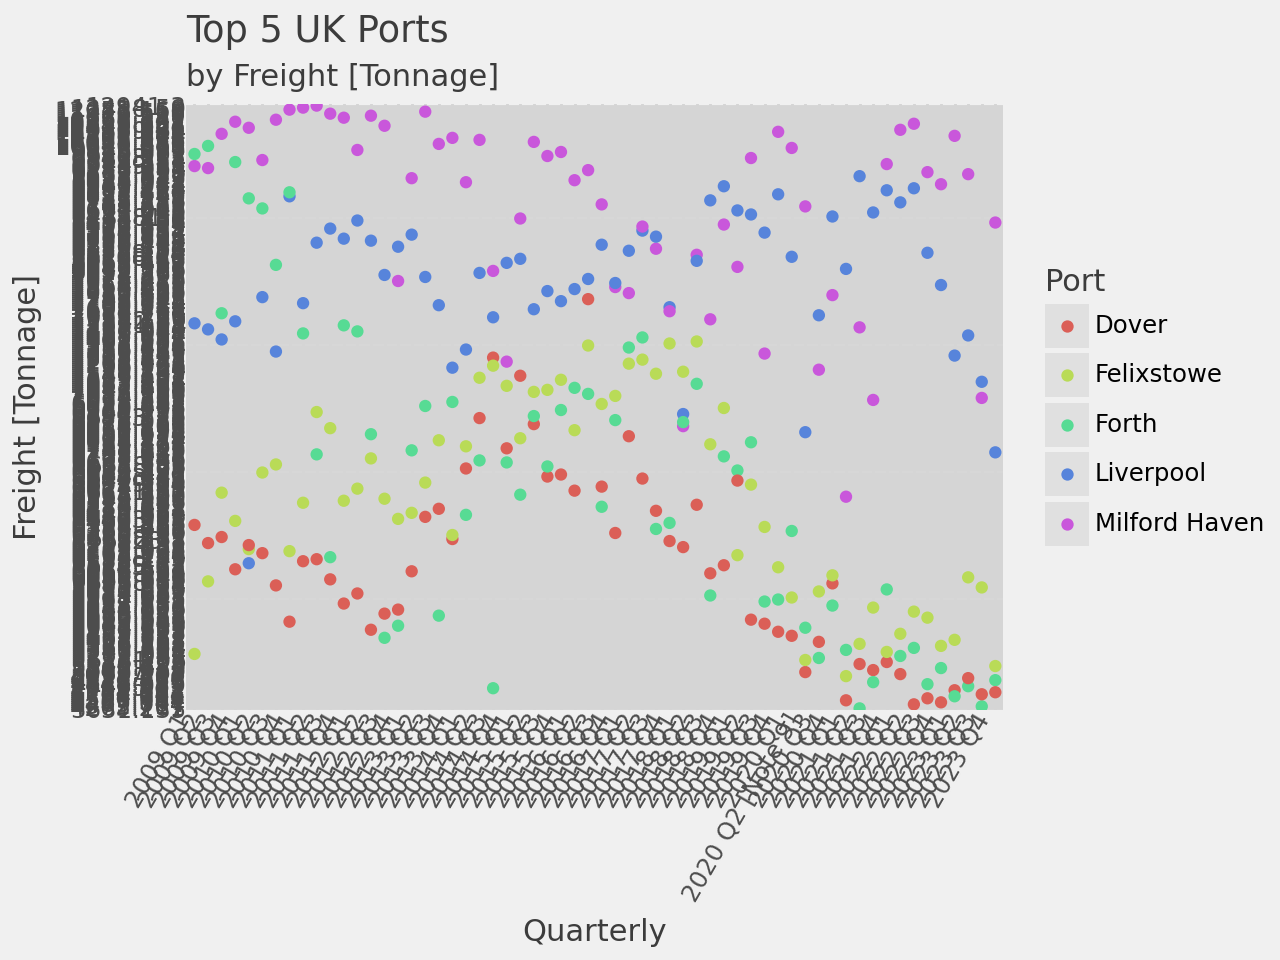

In [127]:
# Create the plot
(ggplot(top_5_ports_melted, aes(x='date', y='Freight', color='Port', group='Port'))
 + geom_point()
#  + geom_line()
 + theme_538()
 + labs(title='Top 5 UK Ports',
        subtitle='by Freight [Tonnage]',
        x='Quarterly',
        y='Freight [Tonnage]')
 + theme(axis_text_x=element_text(angle=60, hjust=1))
#  + scale_y_discrete([2000, 4000, 6000, 8000])
 )


- Visualizacion Puertos UK: Grupos y Autoridad Policial por Region
- Tratamiento Datos y Visualizacion Droga UK (+ Puertos UK)

Estudio correlacion entre series temporales

## Analisis Drug Seizure

In [128]:
uk_drug_seizure_df

,Police force region or authority,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22
0,Cleveland,3147,2496,2382,2462,1532,2140,1866,2017,2357,1935,1853,1900,1812,2432,2962,3135
1,Durham,2036,2060,1524,1497,1716,1590,1433,1756,1833,1569,1436,1620,1660,1704,1965,2043
2,Northumbria,4064,3648,5384,5011,5328,5584,5030,4797,4061,4044,3802,4121,4699,5069,5274,4400
3,Cheshire,736,1258,2024,2085,2223,1635,916,685,831,653,1064,2070,3138,1912,2085,1457
4,Cumbria,1416,1301,1201,1489,1536,1657,1408,1394,1244,942,870,834,968,896,1119,970
5,Greater Manchester,10137,12581,11952,10801,11740,11024,9214,7895,6249,4693,3948,4631,5351,7651,9509,7829
6,Lancashire,2866,3505,3816,4176,3812,3885,3311,2851,2326,1877,1167,1169,945,2303,2740,2401
7,Merseyside,1408,1745,13784,12946,1797,1948,1639,2452,2097,1629,550,582,655,1032,906,674
8,Humberside,2667,2458,2887,2817,2993,3196,2533,2316,1804,1390,1187,898,1023,1077,1733,1725
9,North Yorkshire,1397,1618,1602,1566,1731,1926,1511,1939,2204,1789,1990,1830,2145,2152,2233,2124


In [129]:
uk_drug_seizure_kg_df

,Police force region or authority,Cocaine,Crack,Ecstasy (MDMA),Heroin,LSD,Methadone,Morphine,Cannabis (Herbal),Cannabis (Resin),Cannabis Plants,Amphetamines,Barbiturates,Ketamine,Anabolic Steroids,Benzodiazepines,GHB,Temazepam
0,Cleveland,5.93,0.81,0.46,1.54,0.01,4.47,3.42,66.17,0.42,6817.00,9.90,0.00,0.00,0.72,16.52,0.00,9.87
1,Durham,1.41,0.08,0.18,1.17,0.00,0.20,0.42,8.75,1.09,15009.00,0.95,0.00,0.00,0.36,3.13,0.00,0.30
2,Northumbria,62.23,0.62,10.05,10.39,0.14,2.23,0.94,214.76,13.07,29493.00,3.59,0.00,2.20,4.39,31.10,0.00,0.87
3,Cheshire,2.27,0.40,0.13,0.40,0.01,0.01,0.11,8.59,0.34,1443.00,1.71,0.00,0.05,0.00,0.38,0.00,0.00
4,Cumbria,10.90,1.06,8.39,4.82,0.01,0.20,0.00,84.73,0.49,6448.00,8.23,0.00,0.64,0.00,10.44,0.00,0.01
5,Greater Manchester,1.66,0.43,0.31,0.51,0.03,0.15,0.00,69.10,6.62,14783.00,0.20,0.00,0.06,0.23,3.86,0.00,0.00
6,Lancashire,6.30,1.37,0.39,16.70,0.04,0.94,0.00,109.94,4.26,44401.00,6.90,0.00,0.60,1.40,13.43,0.00,0.03
7,Merseyside,29.83,2.25,0.00,35.31,0.00,0.36,0.00,3.71,5.63,44226.00,31.13,0.00,16.69,0.73,3.45,0.00,0.00
8,Humberside,2.94,3.44,0.01,1.79,0.00,1.17,0.00,57.88,0.00,5527.00,2.80,0.00,0.07,0.09,0.14,0.00,0.00
9,North Yorkshire,1.36,0.04,2.55,0.16,0.01,0.00,0.01,19.14,0.07,1198.00,0.04,0.00,0.05,0.01,0.21,0.00,0.00


In [130]:
uk_drug_seizure_ppm_df

,Police force region or authority,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22
0,Cleveland,5682.1,4505.1,4293.3,4438.9,2756.8,3839.0,3341.8,3603.4,4202.4,3442.6,3283.7,3356.0,3191.7,4273.1,5198.6,5506.8
1,Durham,3388.5,3401.6,2501.2,2447.4,2787.3,2570.4,2312.8,2826.1,2941.6,2510.1,2287.4,2571.4,2620.2,2675.5,3067.7,3243.4
2,Northumbria,2907.3,2601.2,3831.5,3556.1,3764.1,3931.2,3531.5,3356.0,2830.6,2813.3,2631.6,2844.9,3225.9,3462.7,3586.7,3038.9
3,Cheshire,731.4,1241.9,1989.0,2042.5,2169.4,1589.4,887.9,662.0,799.7,625.8,1015.2,1963.7,2962.4,1792.5,1949.2,1330.5
4,Cumbria,2838.7,2598.0,2397.6,2973.3,3071.0,3315.2,2821.1,2798.8,2498.6,1891.6,1747.3,1673.4,1940.3,1792.0,2239.0,1940.8
5,Greater Manchester,3925.6,4841.4,4561.8,4091.5,4410.5,4105.2,3409.8,2908.0,2286.6,1702.7,1419.1,1654.6,1902.5,2698.1,3338.5,2729.9
6,Lancashire,1982.0,2418.2,2629.6,2874.2,2615.8,2658.6,2259.0,1941.0,1580.2,1269.9,785.8,784.3,630.7,1526.2,1808.0,1568.1
7,Merseyside,1029.1,1276.1,10069.8,9437.3,1306.1,1410.8,1182.8,1768.4,1507.4,1165.2,391.1,410.8,460.3,721.7,631.7,473.5
8,Humberside,2950.7,2707.0,3164.1,3085.1,3270.1,3481.3,2749.7,2511.4,1952.6,1502.6,1279.3,965.7,1097.5,1154.6,1854.6,1843.1
9,North Yorkshire,1799.6,2071.7,2038.8,1985.3,2179.8,2410.5,1882.5,2408.2,2734.6,2211.0,2447.0,2232.3,2601.9,2596.9,2685.1,2595.6


## Ports vs Drug Seizure

In [134]:
uk_ports_df

,Port,key_1,Major/Minor ports,Port group,UK Country,id_Port,Police force region
0,Aberdeen,0.0,Major port,Scotland East Coast,Scotland,0,Northumbria
1,Appledore,0.0,Minor port,Bristol Channel,NaN,1,Avon & Somerset
2,Ardrishaig,0.0,Minor port,Scotland West Coast,NaN,2,Cumbria
3,Ayr,0.0,Minor port,Scotland West Coast,NaN,3,Cumbria
4,Barrow,0.0,Minor port,Lancs and Cumbria,NaN,4,Cumbria
...,...,...,...,...,...,...,...
110,Wisbech,0.0,Minor port,Wash & Northern E Anglia,NaN,110,Norfolk
111,Workington,0.0,Minor port,Lancs and Cumbria,NaN,111,Cumbria
112,Rivers Hull & Humber,0.0,NaN,NaN,England,117,NaN
113,Tees & Hartlepool,0.0,NaN,NaN,England,118,NaN


In [137]:
uk_ports_df.loc[uk_ports_df["Police force region"] == "Merseyside"]

,Port,key_1,Major/Minor ports,Port group,UK Country,id_Port,Police force region
